In [1]:
import json
import pandas as pd

with open('../data/data_SurahAyat.json', encoding="utf8") as f:
    surat = json.load(f)

with open('../data/data_tafsir.json', encoding="utf8") as f:
    tafsir = json.load(f)

# with open('data/All_surah.txt', encoding="utf8") as surah_file:
#     all_surah = json.load(surah_file)

In [2]:
surat['intents'][0]

{'tag': 'salam',
 'patterns': ['halo', 'hai', 'hi', 'hay'],
 'responses': ['halo, ada yang bisa saya bantu?',
  'hai, ada yang ingin kamu tanyakan?']}

In [3]:
pola_teks=[]
intents = []

for intent in surat['intents']:
    for pattern in intent['patterns']:
        pola_teks.append(pattern)
        intents.append(intent['tag'])

for intent in tafsir['intents']:
    for pattern in intent['patterns']:
        pola_teks.append(pattern)
        intents.append(intent['tag'])

df = pd.DataFrame({'pola_teks': pola_teks,
                    'intents': intents})

len(set(intents))
df

,pola_teks,intents
0,halo,salam
1,hai,salam
2,hi,salam
3,hay,salam
4,qs alfatihah ayat,fatihah
...,...,...
2152,tafsir qs an nas ayat,nas_tafsir
2153,tafsir qs annas ayat,nas_tafsir
2154,tafsir an nas ayat,nas_tafsir
2155,tafsir annas ayat,nas_tafsir


In [4]:
for i in range(len(df.pola_teks)):
    df.pola_teks[i] = df.pola_teks[i].split()

df

C:\Users\Lord Of Zangester\AppData\Local\Temp\ipykernel_9116\1537608661.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.pola_teks[i] = df.pola_teks[i].split()


,pola_teks,intents
0,[halo],salam
1,[hai],salam
2,[hi],salam
3,[hay],salam
4,"[qs, alfatihah, ayat]",fatihah
...,...,...
2152,"[tafsir, qs, an, nas, ayat]",nas_tafsir
2153,"[tafsir, qs, annas, ayat]",nas_tafsir
2154,"[tafsir, an, nas, ayat]",nas_tafsir
2155,"[tafsir, annas, ayat]",nas_tafsir


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidfVectorizer = TfidfVectorizer(norm=None, smooth_idf=True) # Ini untuk TFIDF
countVectorizer = CountVectorizer() # Ini untuk ngeliat tiap frequency term 
tfidf = tfidfVectorizer.fit_transform(pola_teks)
count = countVectorizer.fit_transform(pola_teks)
tfidf[1898].toarray()
tfidfVectorizer.vocabulary_

{'halo': 269,
 'hai': 266,
 'hi': 277,
 'hay': 276,
 'qs': 383,
 'alfatihah': 50,
 'ayat': 218,
 'al': 12,
 'fatihah': 247,
 'surat': 410,
 'alfatiha': 49,
 'fatiha': 246,
 'albaqarah': 39,
 'baqarah': 229,
 'albaqara': 38,
 'baqara': 228,
 'baqoro': 230,
 'aliimran': 80,
 'ali': 79,
 'imran': 288,
 'imron': 289,
 'annisa': 171,
 'an': 154,
 'nisa': 365,
 'almaidah': 112,
 'maidah': 324,
 'almaida': 111,
 'maida': 323,
 'alanam': 25,
 'anam': 155,
 'alaraf': 32,
 'araf': 174,
 'alanfal': 28,
 'anfal': 158,
 'attaubah': 215,
 'at': 202,
 'taubah': 432,
 'attauba': 214,
 'tauba': 431,
 'tawbah': 434,
 'tawba': 433,
 'yunus': 444,
 'surah': 409,
 'alhud': 74,
 'hud': 280,
 'alhut': 78,
 'hut': 284,
 'yusuf': 445,
 'arrad': 175,
 'ar': 173,
 'rad': 386,
 'arrat': 177,
 'rat': 388,
 'ibrahim': 285,
 'alhijr': 73,
 'hijr': 279,
 'alhijir': 72,
 'hijir': 278,
 'annahl': 163,
 'nahl': 355,
 'annahal': 162,
 'nahal': 354,
 'alisra': 93,
 'isra': 300,
 'alisro': 94,
 'isro': 301,
 'alkahfi': 103

In [6]:
D_idx = []
for i in range(2157):
    D_idx.append('D' + str(i+1))

df_tfidf = pd.DataFrame(data=tfidf.toarray(), columns=tfidfVectorizer.vocabulary_, index=D_idx)

df_tfidf.T

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D2148,D2149,D2150,D2151,D2152,D2153,D2154,D2155,D2156,D2157
halo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fajar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
insirah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alinsirah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
syarh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Ini untuk mengubah label sesuai indeksnya
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df.intents) 
# print(len(le.inverse_transform(label)))
label

array([282, 282, 282, ..., 218, 218, 218])

In [8]:
x = tfidf
y = label

y.shape

(2157,)

In [9]:
#Pembagian data train dan test
from sklearn.model_selection import train_test_split

teks_train, teks_test, label_train, label_test = train_test_split(x,y, test_size=.20)

teks_train.shape
# teks_test.shape


(1725, 452)

In [10]:
# Ini untuk nge define MLPnya dan Training
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64), activation='relu', solver='sgd', batch_size=15, verbose=True ,learning_rate_init=0.007) #relu ini hanya untuk hidden layer
mlp.out_activation = 'softmax' # untuk mendefinisikan bahwa di layer output kita mau pake softmax

mlp.fit(teks_train, label_train)

Iteration 1, loss = 5.81010502
Iteration 2, loss = 5.63592091
Iteration 3, loss = 5.40936437
Iteration 4, loss = 5.09560837
Iteration 5, loss = 4.67836192
Iteration 6, loss = 4.19040031
Iteration 7, loss = 3.67340631
Iteration 8, loss = 3.15769379
Iteration 9, loss = 2.68385829
Iteration 10, loss = 2.25546819
Iteration 11, loss = 1.87394437
Iteration 12, loss = 1.54458893
Iteration 13, loss = 1.25716338
Iteration 14, loss = 1.02276542
Iteration 15, loss = 0.82389019
Iteration 16, loss = 0.66474933
Iteration 17, loss = 0.54141242
Iteration 18, loss = 0.43802967
Iteration 19, loss = 0.35952437
Iteration 20, loss = 0.29562211
Iteration 21, loss = 0.24617322
Iteration 22, loss = 0.20860112
Iteration 23, loss = 0.17727459
Iteration 24, loss = 0.15393653
Iteration 25, loss = 0.13466158
Iteration 26, loss = 0.11974544
Iteration 27, loss = 0.10703021
Iteration 28, loss = 0.09672056
Iteration 29, loss = 0.08884209
Iteration 30, loss = 0.08129566
Iteration 31, loss = 0.07504320
Iteration 32, los

MLPClassifier(batch_size=15, hidden_layer_sizes=64, learning_rate_init=0.007,
              solver='sgd', verbose=True)

In [11]:
#Pengujian
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# import seaborn as sn


predict_test = mlp.predict(teks_test)
acc_test = accuracy_score(label_test, predict_test)
print(f"Testing accuracy : {acc_test}")


Testing accuracy : 0.8564814814814815


In [12]:
def calculate_metrics_per_class(conf_mat):
    num_classes = len(conf_mat)
    metrics_per_class = {}

    for i in range(num_classes):
        true_positives = conf_mat[i, i]
        false_positives = conf_mat[:, i].sum() - true_positives
        false_negatives = conf_mat[i, :].sum() - true_positives

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2 * (precision * recall) / (precision + recall)

        metrics_per_class[i] = {'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

    return metrics_per_class

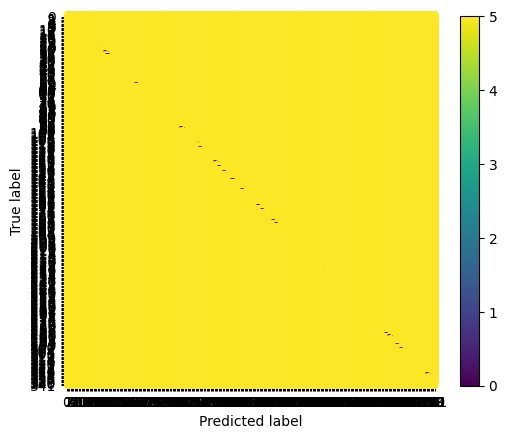

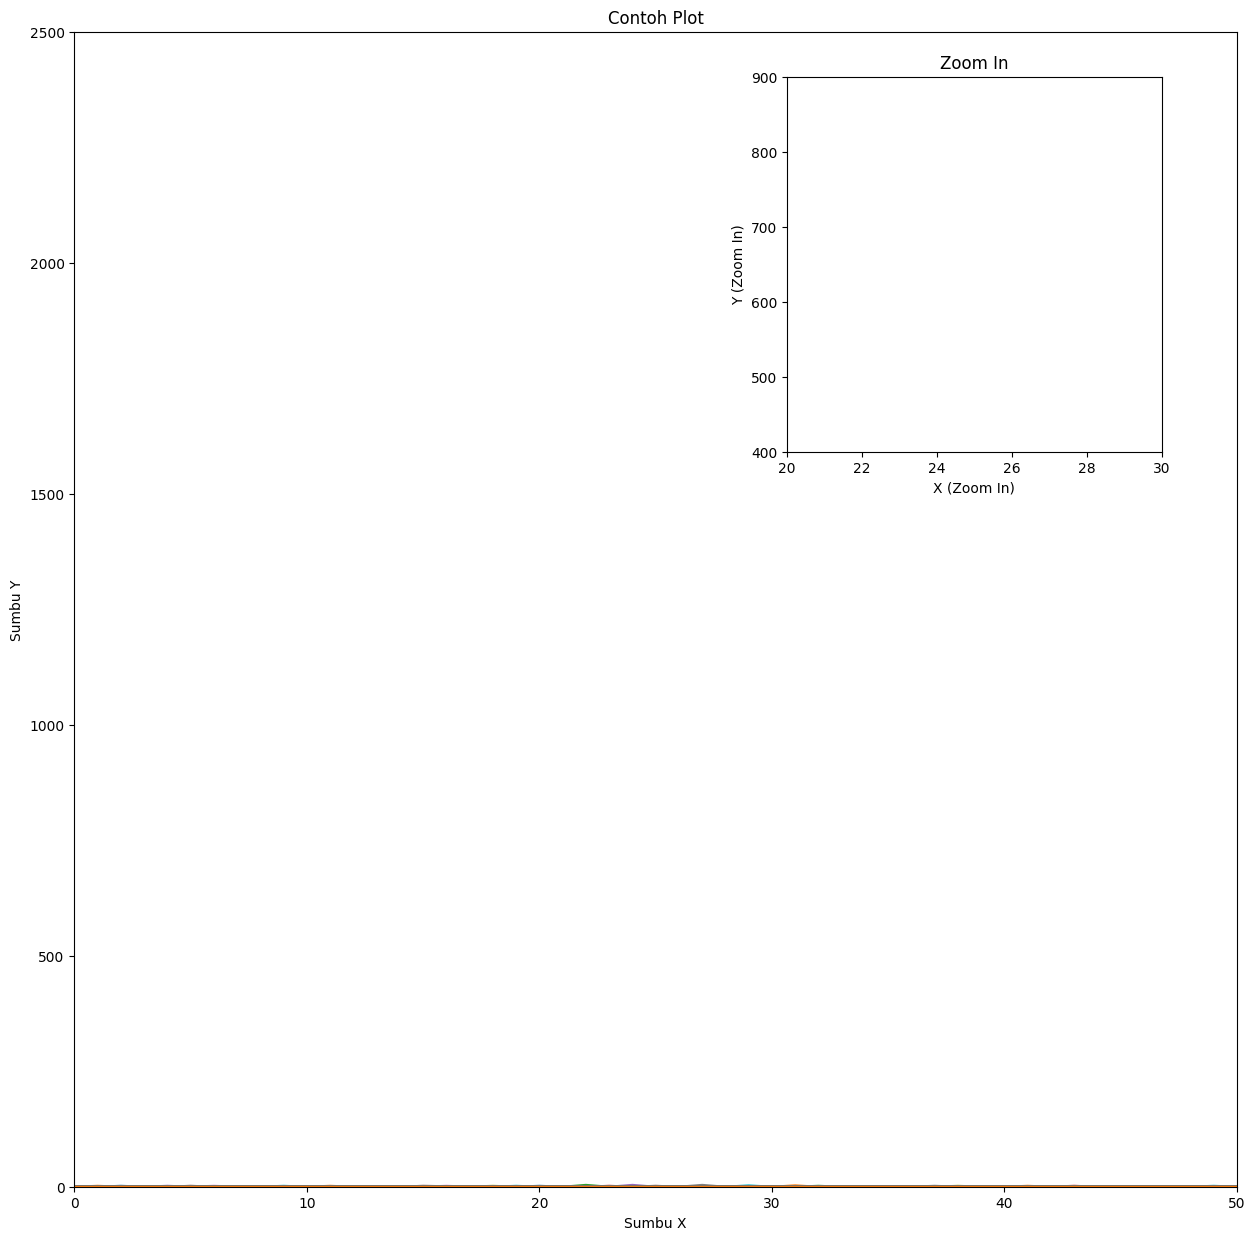

In [24]:


# print(len(mlp.coefs_[1][0]))
# mlp.coefs_[1][63]


# cm = confusion_matrix(label_test,predict_test)
# sn.heatmap(cm, annot=True, cmap='Blues')


disp = ConfusionMatrixDisplay.from_predictions(label_test, predict_test)
plt.figure(figsize=(15,15))
plt.plot(disp.confusion_matrix)
plt.xlabel('Sumbu X')
plt.ylabel('Sumbu Y')
plt.title('Contoh Plot')
plt.xlim(0, 50)
plt.ylim(0, 2500)

# Tambahkan sumbu sekunder untuk zoom in
plt.axes([0.6, 0.6, 0.25, 0.25])  # koordinat (posisi) dan ukuran sumbu sekunder
plt.plot(disp.confusion_matrix)
plt.xlabel('X (Zoom In)')
plt.ylabel('Y (Zoom In)')
plt.title('Zoom In')

# Batasi rentang sumbu x dan y pada plot zoom in
plt.xlim(20, 30)
plt.ylim(400, 900)
plt.show()


In [14]:
# metrics_per_class = calculate_metrics_per_class(cm)
# for class_id, metrics in metrics_per_class.items():
#     print(f"Class {class_id}: Precision={metrics['Precision']}, Recall={metrics['Recall']}, F1-Score={metrics['F1-Score']}")

In [15]:
import numpy as np

cr = classification_report(label_test, predict_test, labels=np.arange(0,len(le.classes_),1), target_names=le.classes_)

print(cr)

                    precision    recall  f1-score   support

             abasa       0.33      1.00      0.50         1
       abasa_surah       1.00      1.00      1.00         2
      abasa_tafsir       0.00      0.00      0.00         2
            adiyat       0.00      0.00      0.00         0
      adiyat_surah       1.00      0.67      0.80         3
     adiyat_tafsir       0.00      0.00      0.00         0
             ahqaf       1.00      1.00      1.00         2
       ahqaf_surah       1.00      1.00      1.00         2
      ahqaf_tafsir       1.00      1.00      1.00         1
             ahzab       0.33      1.00      0.50         1
       ahzab_surah       1.00      0.67      0.80         3
      ahzab_tafsir       1.00      1.00      1.00         1
               ala       0.00      0.00      0.00         0
         ala_surah       1.00      1.00      1.00         2
        ala_tafsir       1.00      1.00      1.00         1
              alaq       0.00      0.00

E:\Development\Python\InQuran-chatbot-alquran\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Development\Python\InQuran-chatbot-alquran\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Development\Python\InQuran-chatbot-alquran\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [16]:
# Nge save model MLPnya
import pickle

# filename = "model_mlp.pickle"

# pickle.dump(mlp, open(filename, "wb"))
#filename.close()

In [17]:
# Nge save label yang sudah kita fit(ubah sesuai indeks) tadi

# le_filename = open("label_mlp.pickle", "wb")
# pickle.dump(le, le_filename)
# le_filename.close()


In [18]:
# save tfidf vocabularynya

# import pickle
# pickle.dump(tfidfVectorizer.vocabulary_, open("tfidf.pkl", "wb"))